In [1]:
import pandas as pd
import numpy as np
from scipy import stats


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# import shap #  Cannot install on Python version 3.13.0; only versions >=3.9,<3.13 are supported.

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

### Read data set with UQS and CQMs

In [2]:
# train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\LFW_scores.csv')
# train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\Flickr-0to9999.csv')
train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\RandomForestUQS\\combined_files.csv')
# train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\Flickr-only.csv')


### Inspect data

In [14]:
#train_df.columns

In [15]:
train_df.describe()

,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,CompressionArtifacts,...,LeftwardCropOfTheFaceImage.scalar,RightwardCropOfTheFaceImage.scalar,MarginAboveOfTheFaceImage.scalar,MarginBelowOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57
count,58233.000000,58233.000000,58233.000000,58233.000000,58233.000000,58219.000000,58219.000000,58233.000000,58233.000000,58233.000000,...,58233.000000,58233.000000,58233.000000,58233.000000,58233.000000,58233.000000,58233.00000,58233.000000,58233.000000,0.0
mean,22.902857,104.073900,0.453054,0.263470,0.022051,0.185613,0.001017,6.828051,18.249086,0.969519,...,99.998987,99.994007,22.104889,11.756032,92.772620,97.435526,99.59274,38.351347,90.077602,NaN
std,3.112427,92.151680,0.211334,0.105525,0.016372,0.180541,0.009906,0.529075,29.121444,0.036981,...,0.208478,0.664474,30.115911,24.699963,11.193466,3.957491,1.65304,28.520826,26.989531,NaN
min,7.290818,0.000000,0.000000,0.012850,0.000076,0.000000,0.000000,2.861356,-50.000000,0.631405,...,50.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,6.000000,0.000000,NaN
25%,20.685204,41.038982,0.293981,0.187555,0.010734,0.055242,0.000000,6.534154,-5.000000,0.958282,...,100.000000,100.000000,3.000000,0.000000,91.000000,97.000000,100.00000,15.000000,100.000000,NaN
50%,23.028292,79.378320,0.472656,0.251962,0.017822,0.120469,0.000000,6.897281,28.000000,0.988147,...,100.000000,100.000000,6.000000,0.000000,97.000000,99.000000,100.00000,25.000000,100.000000,NaN
75%,25.172106,138.734820,0.625344,0.326820,0.028694,0.257688,0.000000,7.204407,45.000000,0.993678,...,100.000000,100.000000,27.000000,2.000000,99.000000,100.000000,100.00000,60.000000,100.000000,NaN
max,32.818428,1341.984109,1.000000,0.828101,0.172065,1.000000,0.402680,7.937083,50.000000,1.008146,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,NaN


In [16]:
#train_df.dtypes

In [17]:
# What is z-score exactly again?
#stats.zscore(train_df['MarginBelowOfTheFaceImage']).sort_values().tail(10)

In [19]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))

,0
Unnamed: 57,58233
UnderExposurePrevention,14
OverExposurePrevention,14
UnifiedQualityScore,0
BackgroundUniformity,0
Filename,0
LuminanceVariance,0
LuminanceMean,0
DynamicRange,0
IlluminationUniformity,0


In [20]:
train_df['UnderExposurePrevention.scalar'].unique()
# Unique can help identify nan values 
#UnderExposurePrevention.scalar does not have nan but has -1. Maybe same with OverExposurePrevention, check.
# Use .fillna to fill nan values

array([100,  99,  89,  86,  -1,  29,   0,  49,  32,  98,  97,  94,  82,
        14,  96,  63,  80,  79,  23,  36,  92,  90,  58,  21,  95,  91,
        83,  87,  81,  84,  85,  65,  88,  24,  61,  93,  66,  78,  64,
        75,  56,  20,  10,  46,  50,  76,  71,  52,  70,  27,  37,  53,
        59,  55,  74,  28,  47,  51,  73,  48,  12,  60,  16,  67,   1,
        30,  57,  19,   9,  39,  11,  40,   7,  44,  22,   5,  77,  43,
        69,  62,  34,  25,  33,  26,  35,  38,   8,  13,  31,  45,  41,
        15,  42,  72,   2,  54,   6,  68,   4,   3,  17])

In [ ]:
#specific correlations between two CQMs
#train_df['MouthClosed'].corr(train_df['ExpressionNeutrality'])

## Choose to work with native or scalar scores and measures

In [22]:
# Predict scalar UQS based on scalar CQMs
# train_df = train_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
#        'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
#        'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
#        'Sharpness', 'CompressionArtifacts', 'NaturalColour',
#        'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
#        'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
#        'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
#        'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage',
#        'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
#        'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57'])

# Predict native UQS based on native CQMs
# train_df = train_df.drop(columns=['Filename', 'UnifiedQualityScore.scalar', 'BackgroundUniformity.scalar',
#        'IlluminationUniformity.scalar', 'LuminanceMean.scalar', 'LuminanceVariance.scalar',
#        'UnderExposurePrevention.scalar', 'OverExposurePrevention.scalar', 'DynamicRange.scalar',
#        'Sharpness.scalar', 'CompressionArtifacts.scalar', 'NaturalColour.scalar',
#        'SingleFacePresent.scalar', 'EyesOpen.scalar', 'MouthClosed.scalar', 'EyesVisible.scalar',
#        'MouthOcclusionPrevention.scalar', 'FaceOcclusionPrevention.scalar',
#        'InterEyeDistance.scalar', 'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar', 'HeadPoseYaw.scalar', 'HeadPosePitch.scalar',
#        'HeadPoseRoll.scalar', 'ExpressionNeutrality.scalar', 'NoHeadCoverings.scalar', 'Unnamed: 57'])


# Predict scalar UQS based on native CQMs
train_df = train_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity.scalar',
       'IlluminationUniformity.scalar', 'LuminanceMean.scalar', 'LuminanceVariance.scalar',
       'UnderExposurePrevention.scalar', 'OverExposurePrevention.scalar', 'DynamicRange.scalar',
       'Sharpness.scalar', 'CompressionArtifacts.scalar', 'NaturalColour.scalar',
       'SingleFacePresent.scalar', 'EyesOpen.scalar', 'MouthClosed.scalar', 'EyesVisible.scalar',
       'MouthOcclusionPrevention.scalar', 'FaceOcclusionPrevention.scalar',
       'InterEyeDistance.scalar', 'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
       'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
       'MarginBelowOfTheFaceImage.scalar', 'HeadPoseYaw.scalar', 'HeadPosePitch.scalar',
       'HeadPoseRoll.scalar', 'ExpressionNeutrality.scalar', 'NoHeadCoverings.scalar', 'Unnamed: 57'])


## Feature engineering

In [24]:
# train_df['MeanCropScore'] = (train_df['LeftwardCropOfTheFaceImage'] + train_df['RightwardCropOfTheFaceImage']) / 2
# train_df['MeanCropScore.scalar'] = (train_df['LeftwardCropOfTheFaceImage.scalar'] + train_df['RightwardCropOfTheFaceImage.scalar']) / 2

In [25]:
# train_df['MeanCropScore'].head(15)
# train_df['MeanCropScore.scalar'].head(15)

In [26]:
# train_df['MeanMarginScore'] = (train_df['MarginBelowOfTheFaceImage'] + train_df['MarginAboveOfTheFaceImage']) / 2
# train_df['MeanMarginScore.scalar'] = (train_df['MarginBelowOfTheFaceImage.scalar'] + train_df['MarginAboveOfTheFaceImage.scalar']) / 2


In [27]:
# train_df['MeanMarginScore'].head(15)
# train_df['MeanMarginScore.scalar'].head(15)

## Check correlations and drop some correlated features

<Axes: >

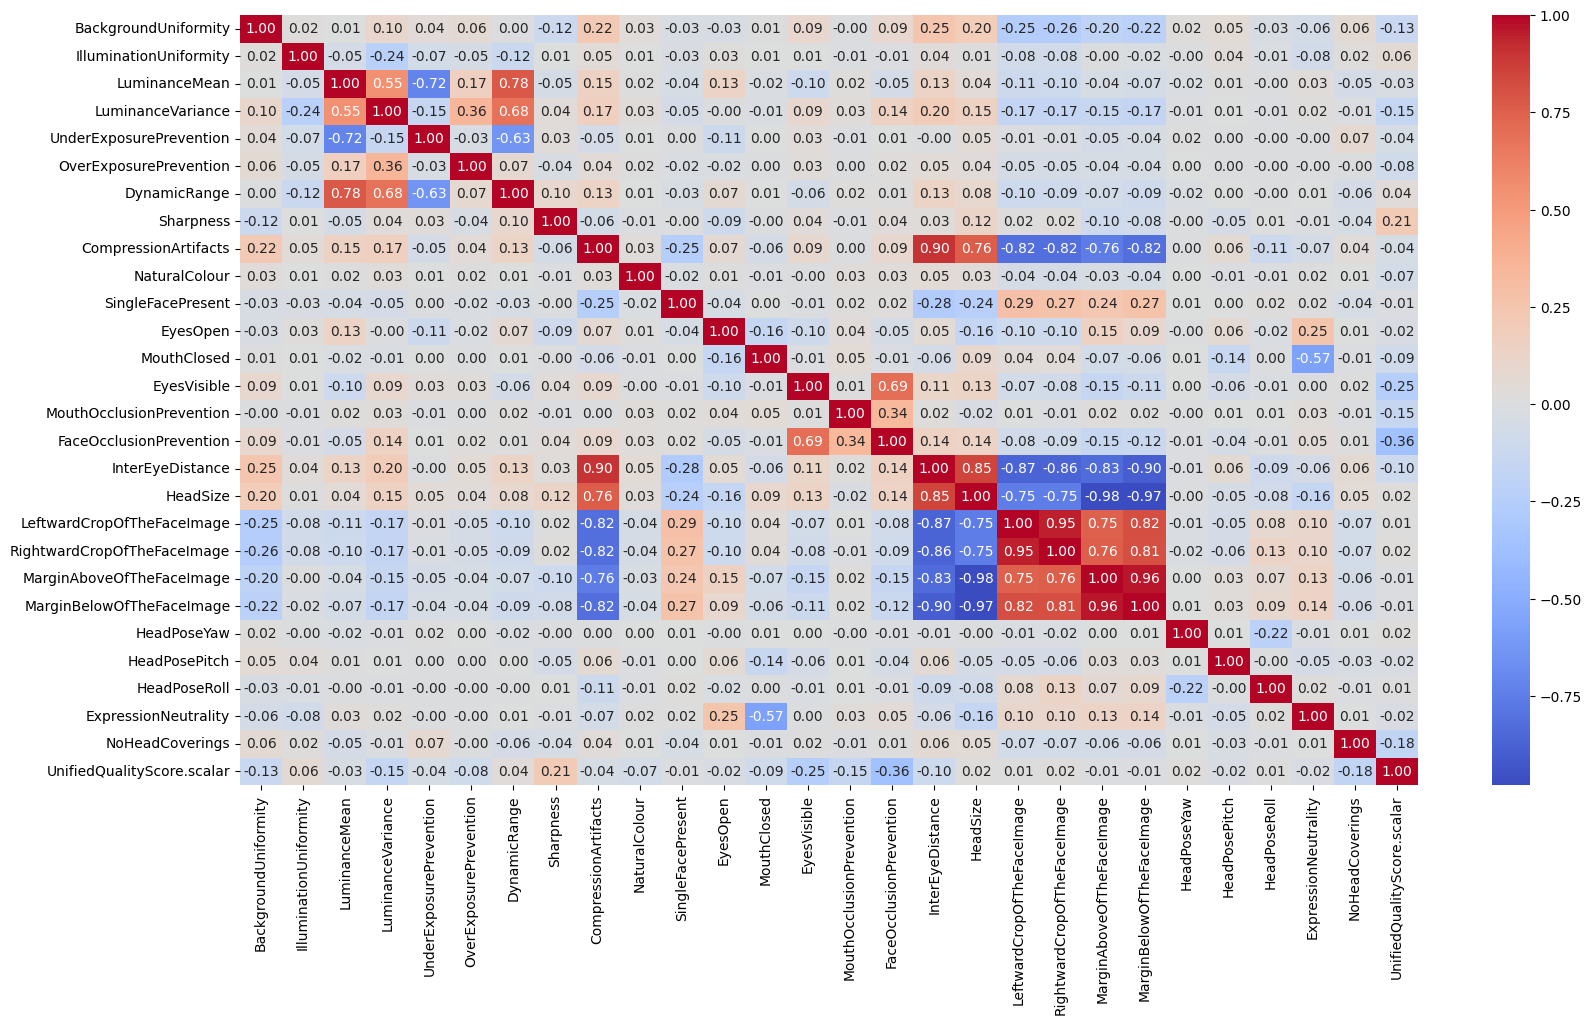

In [36]:
correlations = train_df.corr()
plt.figure(figsize=(19,10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

In [24]:
# FaceOcclusionPrevention or EyesVisible and MouthOcclusionPrevention?
# Remove ExpressionNeutrality or the ones it correlates with?
# train_df = train_df.drop(columns=['DynamicRange', 'HeadSize',
#                                   'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 
#                                   'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage'])
# train_df = train_df.drop(columns=['DynamicRange.scalar', 'HeadSize.scalar',
#                                   'LeftwardCropOfTheFaceImage.scalar', 'RightwardCropOfTheFaceImage.scalar', 
#                                   'MarginAboveOfTheFaceImage.scalar', 'MarginBelowOfTheFaceImage.scalar'])

<Axes: >

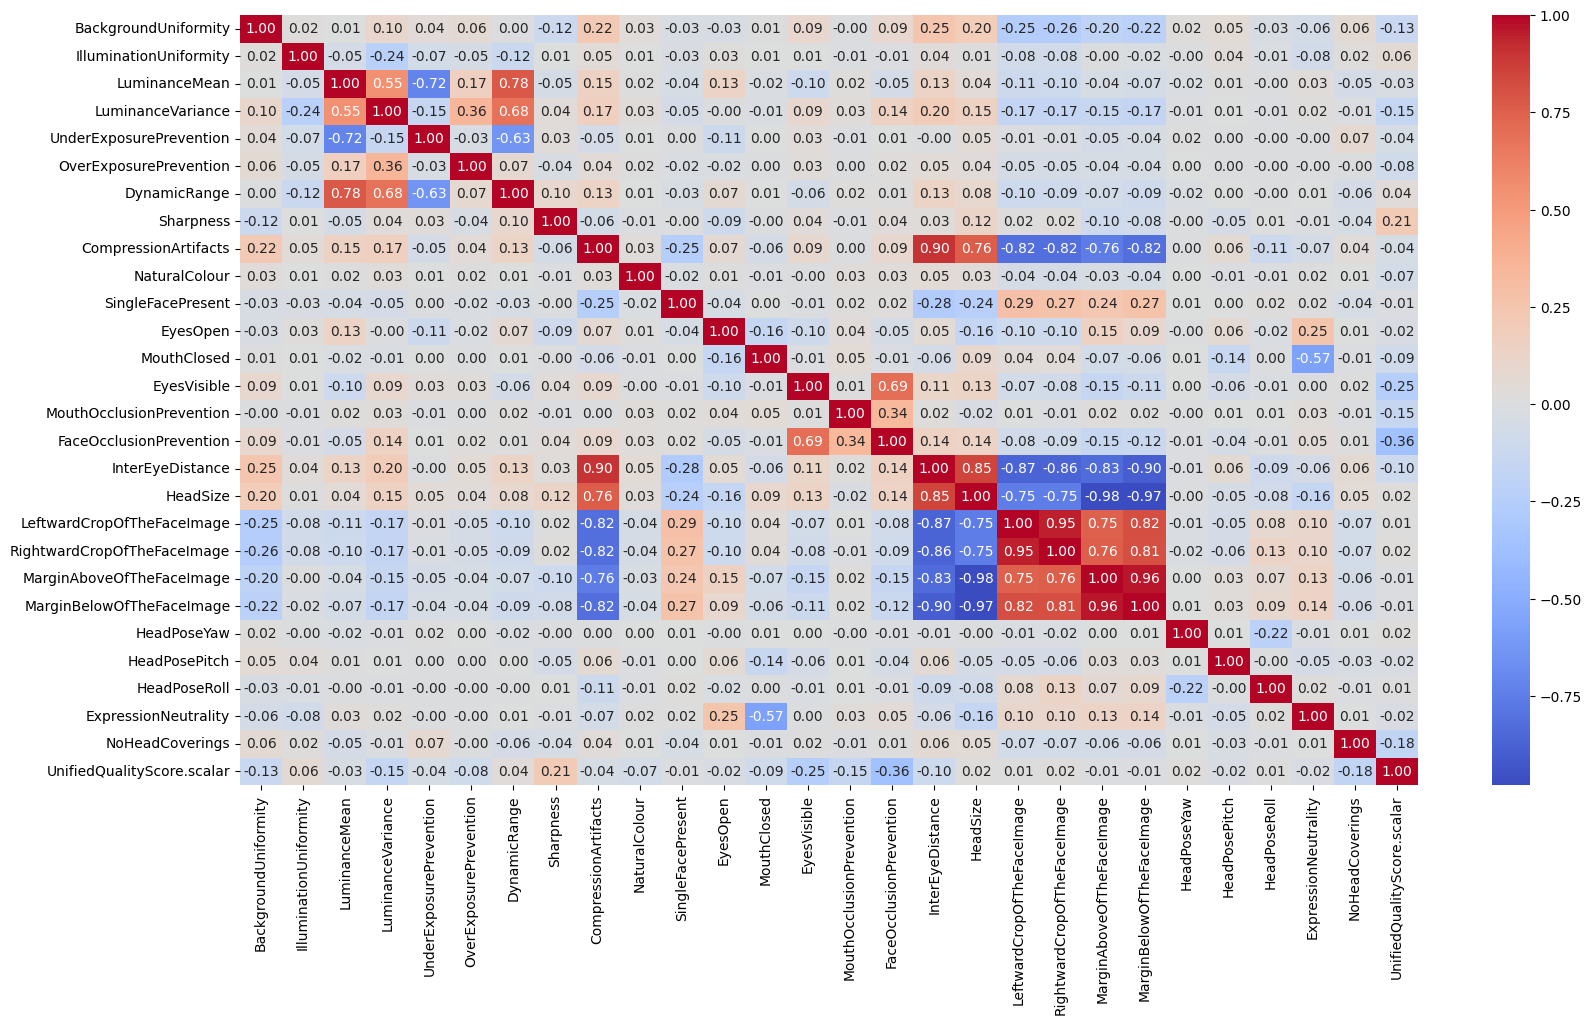

In [45]:
corr_after_drop = train_df.corr()
plt.figure(figsize=(19,10))
sns.heatmap(corr_after_drop, annot=True, cmap='coolwarm', fmt=".2f")

## UQS histogram

<Axes: xlabel='UnifiedQualityScore.scalar', ylabel='Count'>

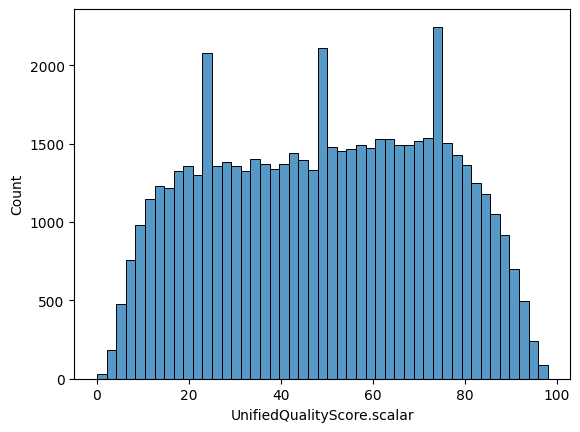

In [26]:
# sns.histplot(
#     train_df,
#     x=train_df['UnifiedQualityScore']
# )

sns.histplot(
    train_df,
    x=train_df['UnifiedQualityScore.scalar']
)

In [27]:
# Consider logarithmic on non-scalar scores, so UnifiedQualityScore for example 
# train_df['UnifiedQualityScore_Log'] = np.log1p(train_df['UnifiedQualityScore'])

In [33]:
column_names = train_df.select_dtypes(include=['int64', 'float64']).columns
# column_names = column_names.drop('UnifiedQualityScore')
column_names = column_names.drop('UnifiedQualityScore.scalar')

In [34]:
# Impute to fill missing values. Might not be necessary...
impute_and_scale_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [37]:
columns_transformed = ColumnTransformer(transformers=[
    ('num_p', impute_and_scale_pipeline, column_names)
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [38]:
preprocess_pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformed)
])

In [39]:
# X = train_df.drop('UnifiedQualityScore', axis=1)
# y = train_df['UnifiedQualityScore']
X = train_df.drop('UnifiedQualityScore.scalar', axis=1)
y = train_df['UnifiedQualityScore.scalar']

In [40]:
X_preprocessed = preprocess_pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=36)

In [43]:
linear_regression = LinearRegression()

In [44]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred_linear_regression = linear_regression.predict(X_test)

In [46]:
mean_squared_error(y_test, y_pred_linear_regression)

375.4653216456949

In [47]:
random_forest_regressor = RandomForestRegressor(random_state=36)

In [48]:
# there are more parameters that we can try to optimize
# Also, maybe consider using Optuna instead
grid_parameters = {
    'max_depth': [30],
    'n_estimators': [1500],
    'min_samples_split': [15]
}
# max_depth: 15, n_estimators: 500, min_samples_split: 10
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives np.float64(2.171904031005836) and 4.803700372340917
# {'max_depth': 12, 'min_samples_split': 10, 'n_estimators': 300} gives np.float64(2.200307762445381) and 4.981448913268783
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives np.float64(2.205441896749015) and 5.02581339484137 with a lot of columns removed
# Removing a lot of columns and FaceOcclusionPrevention as well makes it worse
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives np.float64(2.1872035509314802) and 4.865764880207847 with some luminance stuff removed, headsize removed, margin averaged and crop averaged.
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 2.1734324686963307 and 4.820639260484793 with ['DynamicRange', 'HeadSize', 'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage']
#           removed and crop averaged and margin averaged.
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 17.560840972964996 and 310.4379027848181 with scalar version of ['DynamicRange', 'HeadSize', 'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage']
#           removed and crop averaged and margin averaged.
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 17.520939310617074 and 308.58041605776316 with everything kept (scalar)
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 17.32108712973725 and 298.34084529501126 using all native CQMs to predict scalar UQS. Takes a looong time to train though. 
 


In [49]:
random_forest_cross_val = GridSearchCV(random_forest_regressor, grid_parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [50]:
random_forest_cross_val.fit(X_train, y_train)

KeyboardInterrupt: 

In [1334]:
np.sqrt(-1 * random_forest_cross_val.best_score_)

np.float64(17.32108712973725)

In [1335]:
random_forest_cross_val.best_params_

{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500}

In [1336]:
y_pred_random_forest = random_forest_cross_val.predict(X_test)

In [1337]:
y_pred_random_forest

array([10.48460789, 60.64202662, 56.44445371, ..., 58.32864989,
       38.11261715, 62.65079232])

In [1338]:
y_test

37734     5
8132     70
48331    76
39372    22
53226    17
         ..
39727    68
6030     68
36866    59
33893    36
1245     71
Name: UnifiedQualityScore.scalar, Length: 11647, dtype: int64

In [1339]:
mean_squared_error(y_test, y_pred_random_forest)

298.34084529501126

In [1340]:
mean_absolute_error(y_test, y_pred_random_forest)

14.048059664969735

In [1341]:
mean_absolute_percentage_error(y_test, y_pred_random_forest)

0.4798774560488433

In [1342]:
random_forest_specific = RandomForestRegressor(n_estimators=1000, max_depth= 20, min_samples_split=20, random_state=13)

In [1343]:
model_test = random_forest_specific.fit(X_train, y_train)

In [1344]:
without_uqs = train_df.drop(columns=['UnifiedQualityScore.scalar'])
# without_uqs = train_df.drop(columns=['UnifiedQualityScore'])

In [1345]:
y_pred_single = model_test.predict(X_test)

In [1346]:
y_pred_single

array([10.4187817 , 62.89430864, 56.05818405, ..., 58.79841643,
       38.43381101, 62.63926671])

In [1347]:
y_test

37734     5
8132     70
48331    76
39372    22
53226    17
         ..
39727    68
6030     68
36866    59
33893    36
1245     71
Name: UnifiedQualityScore.scalar, Length: 11647, dtype: int64

In [1348]:
mean_squared_error(y_test, y_pred_single)

299.8553675510863

In [1349]:
mean_absolute_error(y_test, y_pred_single)

14.084809410918558

In [1350]:
mean_absolute_percentage_error(y_test, y_pred_single)

0.4816633419131937

In [1351]:
# TODO: Add link to where I found this.
def plot_feature_importance(model, names, threshold = None):
    feature_importance_df = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_,
                                                    'feature': names})\
            .set_index('feature').sort_values('feature_importance', ascending = False)

    if threshold is not None:
        feature_importance_df = feature_importance_df[feature_importance_df.feature_importance > threshold]

    fig = px.bar(
        feature_importance_df,
        text_auto = '.2f',
        labels = {'value': 'feature importance'},
        title = 'Feature importances'
    )

    fig.update_layout(showlegend = False)
    fig.show()

plot_feature_importance(model_test, without_uqs.columns)

In [1352]:
plot_feature_importance(rfr_cv.best_estimator_, without_uqs.columns)

In [ ]:
permutation_importance = permutation_importance(random_forest_cross_val.best_estimator_, X_test, y_test)

<function ndarray.all>

In [1421]:
permutation_importance

{'importances_mean': array([8.32219067e-03, 2.14304758e-03, 2.65494922e-03, 2.61977715e-02,
        2.46963599e-03, 7.40459977e-03, 1.07068486e-02, 8.87054959e-02,
        8.72153022e-03, 1.57395046e-03, 2.59313196e-04, 6.26348154e-02,
        4.91719497e-02, 1.17294181e-02, 2.84019213e-03, 2.87823584e-01,
        3.15388029e-02, 5.01573070e-03, 1.30876530e-02, 5.89828972e-03,
        5.15594597e-03, 5.19327699e-02, 2.75917757e-02, 2.87326710e-02,
        5.90915903e-03, 1.34304772e-02, 5.84076931e-02]),
 'importances_std': array([0.000722  , 0.00040502, 0.00053008, 0.00217222, 0.00045304,
        0.00095735, 0.00046779, 0.00373854, 0.00053011, 0.00033335,
        0.00011077, 0.0032328 , 0.0010678 , 0.00090314, 0.0006368 ,
        0.0078177 , 0.00199336, 0.00048395, 0.00098681, 0.00042629,
        0.00033526, 0.00146953, 0.00070057, 0.00235752, 0.00085991,
        0.00073942, 0.00142619]),
 'importances': array([[7.97703821e-03, 7.90314745e-03, 9.07239234e-03, 7.39410020e-03,
         

In [1419]:
rand_forest_best_estimator = random_forest_cross_val.best_estimator_
importances = np.zeros((len(rand_forest_best_estimator.estimators_), rand_forest_best_estimator.n_features_in_))
for i,tree in enumerate(rand_forest_best_estimator.estimators_):
    importances[i] = tree.tree_.compute_feature_importances(normalize=False)
np.mean(importances, axis=0)

array([ 13.92897137,  10.72554948,   7.98598301,  16.12553778,
         9.71886882,   6.2733968 ,  10.32076502,  36.81052334,
        13.08066969,   4.26165896,   1.4293702 ,  48.58339614,
        26.92727165,   5.61523715,   2.62882817, 106.63023128,
        16.8607387 ,   6.24034098,  11.12696753,   9.11526271,
         7.44679608,  16.11783192,  22.60447373,  23.18052345,
        11.42836278,  15.26027707,  22.82569634])

In [1353]:
train_df.mean()

BackgroundUniformity            104.073900
IlluminationUniformity            0.453054
LuminanceMean                     0.263470
LuminanceVariance                 0.022051
UnderExposurePrevention           0.185613
OverExposurePrevention            0.001017
DynamicRange                      6.828051
Sharpness                        18.249086
CompressionArtifacts              0.969519
NaturalColour                     2.066408
SingleFacePresent                 0.022476
EyesOpen                          0.075268
MouthClosed                       0.077109
EyesVisible                       0.061145
MouthOcclusionPrevention          0.013321
FaceOcclusionPrevention           0.054590
InterEyeDistance                208.955702
HeadSize                          0.406595
LeftwardCropOfTheFaceImage        2.826080
RightwardCropOfTheFaceImage       2.823054
MarginAboveOfTheFaceImage         1.200000
MarginBelowOfTheFaceImage         1.339362
HeadPoseYaw                      -0.273713
HeadPosePit

In [1354]:
x_test_dataframe = pd.DataFrame(X_test)
x_test_dataframe["prediction_mean"] = 48.490778
predictions_mean = x_test_dataframe["prediction_mean"]
x_test_dataframe.drop(columns=["prediction_mean"])
predictions_mean.head()



0    48.490778
1    48.490778
2    48.490778
3    48.490778
4    48.490778
Name: prediction_mean, dtype: float64

In [1355]:
mean_squared_error(y_test, predictions_mean)

571.538881720651

In [1356]:
mean_absolute_error(y_test, predictions_mean)

20.62114366463467

In [1357]:
mean_absolute_percentage_error(y_test, predictions_mean)

0.7995669833924303

In [1358]:
root_mean_squared_error(y_test, predictions_mean)

23.906879380643787

## Scatter stuff

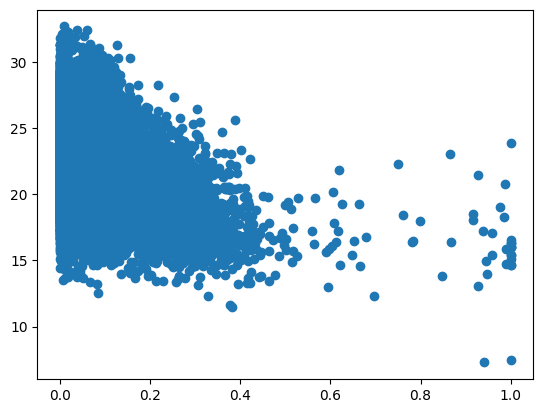

In [ ]:
plt.scatter(x='FaceOcclusionPrevention', y='UnifiedQualityScore', data=train_df)

In [ ]:
to_remove = train_df.query('FaceOcclusionPrevention > 0.7')

In [ ]:
train_df = train_df[train_df.index.isin(to_remove.index) == False]


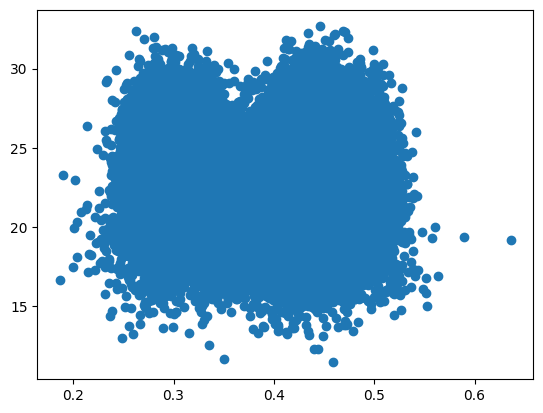

In [ ]:
plt.scatter(x='HeadSize', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('HeadSize > 0.575')
to_remove
train_df = train_df[train_df.index.isin(to_remove.index) == False]


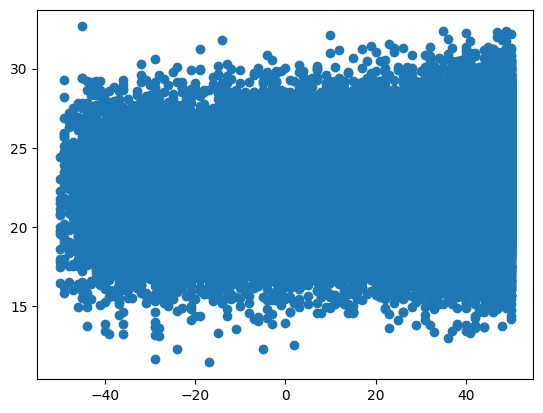

In [ ]:
plt.scatter(x='Sharpness', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('Sharpness < 0 and UnifiedQualityScore > 31')
train_df = train_df[train_df.index.isin(to_remove.index) == False]
to_remove = train_df.query('Sharpness < 0 and UnifiedQualityScore < 13')
train_df = train_df[train_df.index.isin(to_remove.index) == False]


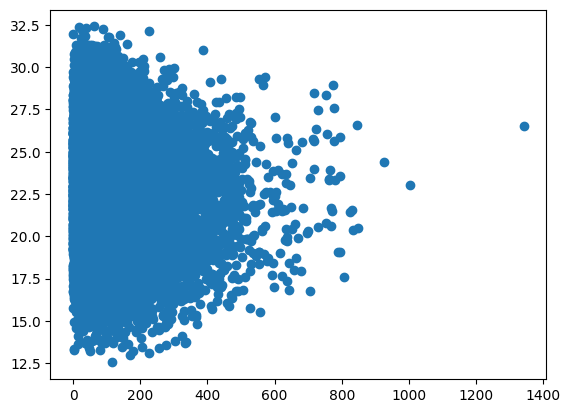

In [ ]:
plt.scatter(x='BackgroundUniformity', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('BackgroundUniformity > 900')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

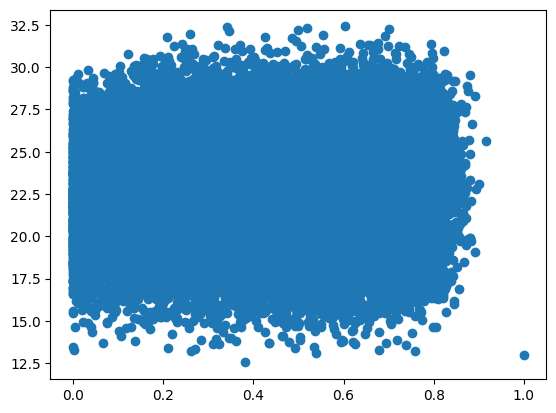

In [ ]:
plt.scatter(x='IlluminationUniformity', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('UnifiedQualityScore < 13')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

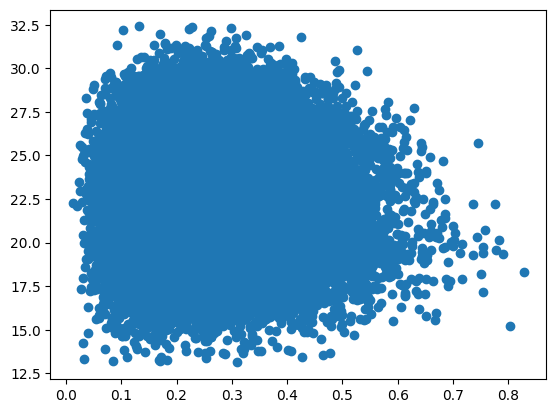

In [ ]:
plt.scatter(x='LuminanceMean', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('LuminanceMean > 0.8')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

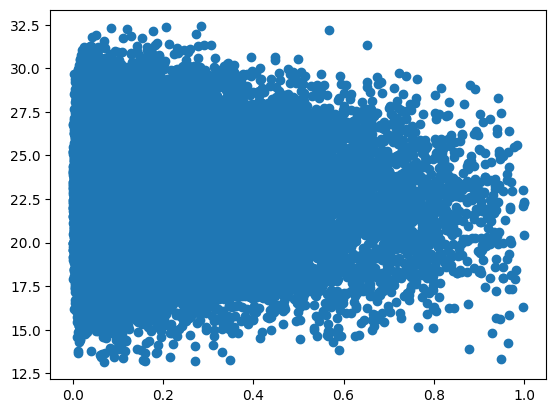

In [ ]:
plt.scatter(x='UnderExposurePrevention', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('UnderExposurePrevention > 0.85 and UnifiedQualityScore < 16')
train_df = train_df[train_df.index.isin(to_remove.index) == False]
to_remove = train_df.query('UnderExposurePrevention > 0.4 and UnifiedQualityScore > 31')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

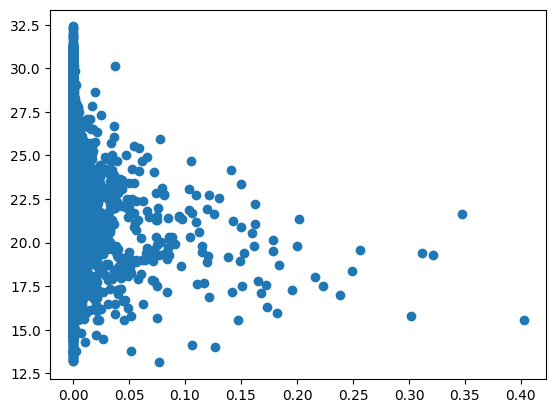

In [ ]:
plt.scatter(x='OverExposurePrevention', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('OverExposurePrevention > 0.275')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

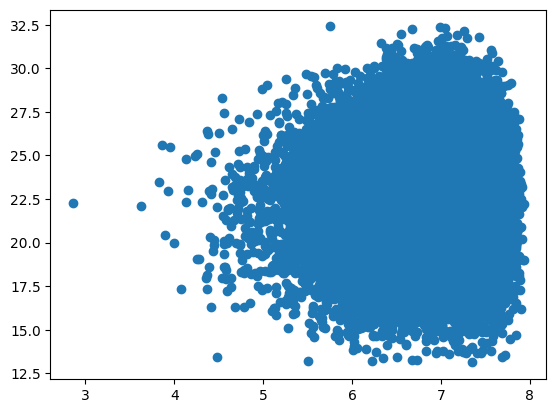

In [ ]:
plt.scatter(x='DynamicRange', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('DynamicRange < 3.5')
train_df = train_df[train_df.index.isin(to_remove.index) == False]
to_remove = train_df.query('DynamicRange < 5.75 and UnifiedQualityScore < 13.5')
train_df = train_df[train_df.index.isin(to_remove.index) == False]
to_remove = train_df.query('DynamicRange < 6 and UnifiedQualityScore > 32')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

In [ ]:
#plt.scatter(x='CompressionArtifacts', y='UnifiedQualityScore', data=train_df)
#to_remove = train_df.query('CompressionArtifacts < 0.75')
#train_df = train_df[train_df.index.isin(to_remove.index) == False]

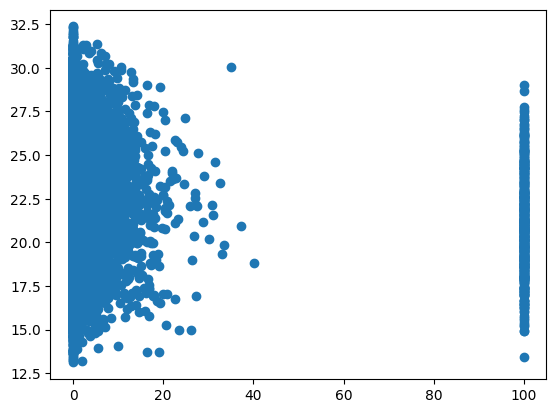

In [ ]:
plt.scatter(x='NaturalColour', y='UnifiedQualityScore', data=train_df)


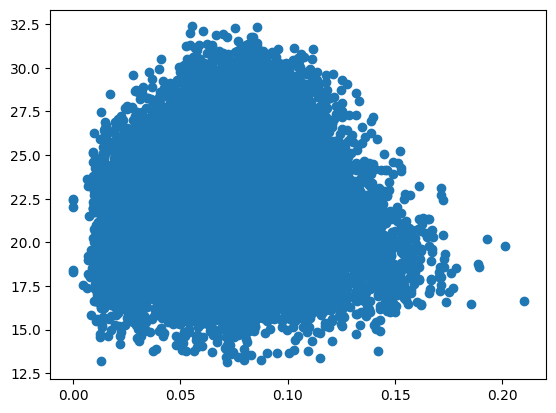

In [ ]:
plt.scatter(x='EyesOpen', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('EyesOpen > 0.17')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

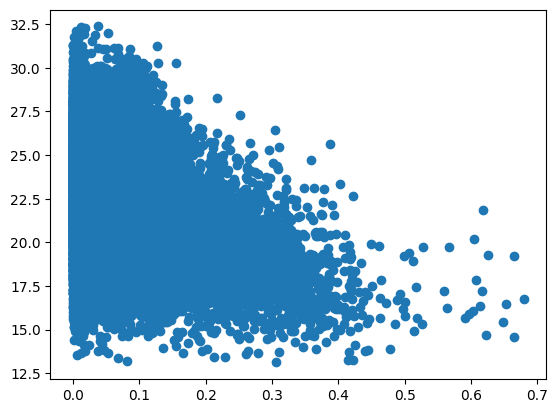

In [ ]:
plt.scatter(x='FaceOcclusionPrevention', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('FaceOcclusionPrevention > 0.5')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

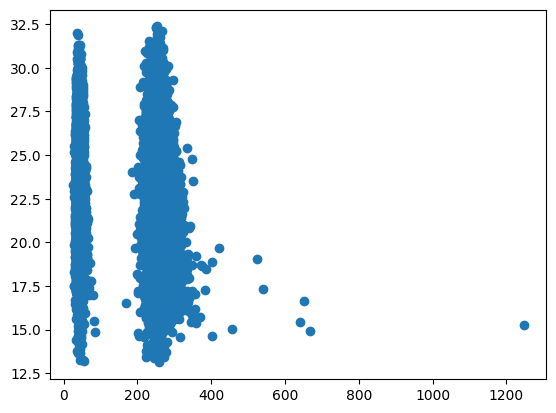

In [ ]:
plt.scatter(x='InterEyeDistance', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('InterEyeDistance > 400')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

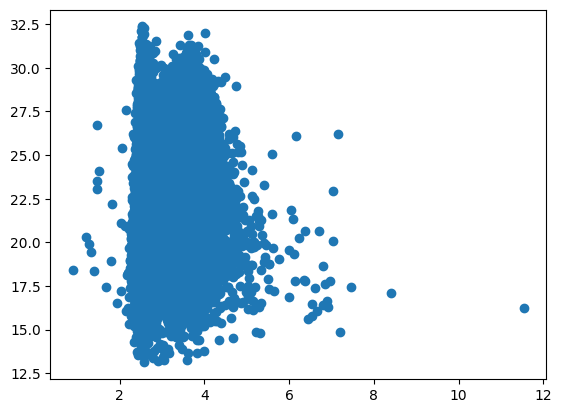

In [ ]:
plt.scatter(x='LeftwardCropOfTheFaceImage', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('LeftwardCropOfTheFaceImage > 5.5 or LeftwardCropOfTheFaceImage < 2')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

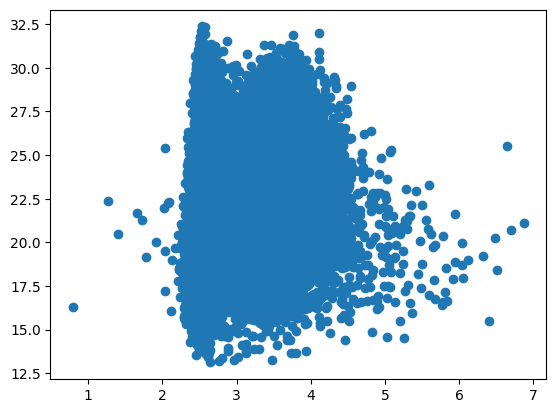

In [ ]:
plt.scatter(x='RightwardCropOfTheFaceImage', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('RightwardCropOfTheFaceImage > 5 or RightwardCropOfTheFaceImage < 2')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

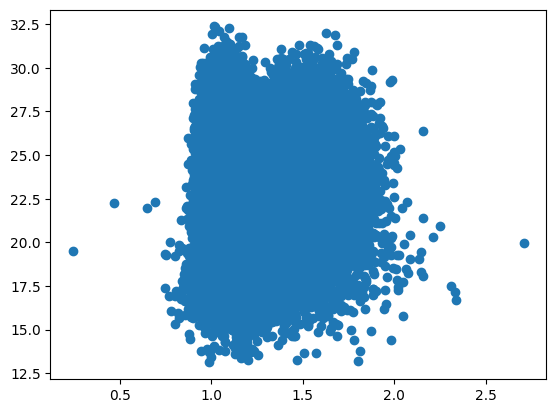

In [ ]:
plt.scatter(x='MarginAboveOfTheFaceImage', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('MarginAboveOfTheFaceImage > 2.0 or MarginAboveOfTheFaceImage < 0.75')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

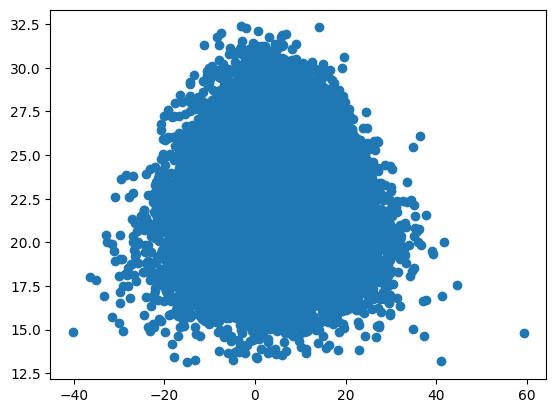

In [ ]:
plt.scatter(x='HeadPosePitch', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('HeadPosePitch > 38 or HeadPosePitch < -32')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

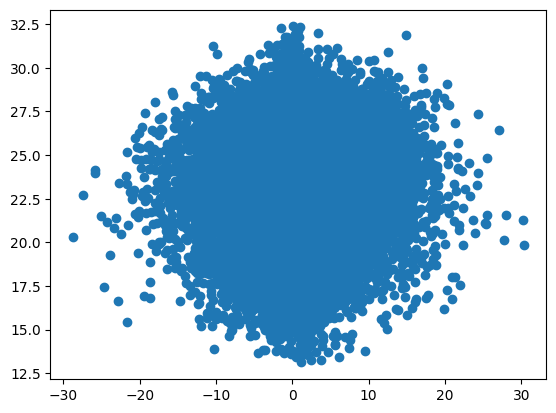

In [ ]:
plt.scatter(x='HeadPoseRoll', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('HeadPoseRoll > 25 or HeadPoseRoll < -23')
train_df = train_df[train_df.index.isin(to_remove.index) == False]

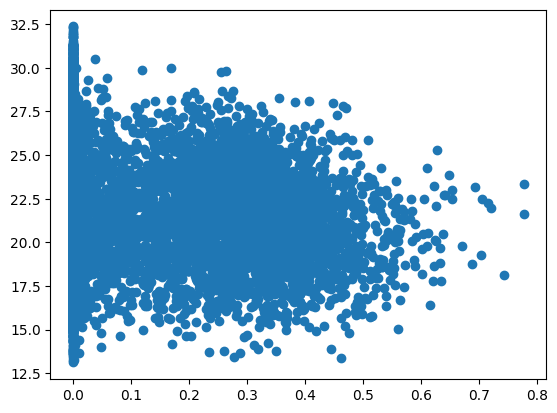

In [ ]:
plt.scatter(x='NoHeadCoverings', y='UnifiedQualityScore', data=train_df)
to_remove = train_df.query('NoHeadCoverings > 0.0')


In [ ]:
to_remove

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,LeftwardCropOfTheFaceImage.scalar,RightwardCropOfTheFaceImage.scalar,MarginAboveOfTheFaceImage.scalar,MarginBelowOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57
2,C://Users//admin//Downloads//lfw//flat_lfw/Aar...,17.987562,64.520862,0.459137,0.243947,0.013221,0.110664,0.000000,6.794354,-34,...,100,100,93,80,96,100,87,98,2,NaN
11,C://Users//admin//Downloads//lfw//flat_lfw/Abb...,21.176453,34.409306,0.347107,0.188585,0.008847,0.054985,0.000292,6.458166,49,...,100,100,86,71,93,97,100,92,100,NaN
13,C://Users//admin//Downloads//lfw//flat_lfw/Abd...,19.427111,187.851509,0.506939,0.154711,0.010546,0.320706,0.000000,6.343090,35,...,100,100,90,73,87,100,100,42,5,NaN
59,C://Users//admin//Downloads//lfw//flat_lfw/Abi...,20.982929,95.567391,0.550964,0.118109,0.009254,0.473144,0.000000,6.237744,19,...,100,100,92,66,99,100,100,31,80,NaN
60,C://Users//admin//Downloads//lfw//flat_lfw/Abi...,19.047457,2.122254,0.507804,0.337729,0.062064,0.205436,0.000000,7.618697,-10,...,100,100,40,18,86,99,90,68,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33203,C://Users//admin//Desktop//Flickr-10000/19970.png,23.995432,44.641841,0.687500,0.227527,0.021921,0.164453,0.000018,7.069655,49,...,100,100,6,0,100,100,100,24,47,NaN
33214,C://Users//admin//Desktop//Flickr-10000/19981.png,22.450264,228.788538,0.035918,0.184828,0.038557,0.475200,0.000203,6.859678,47,...,100,100,32,3,99,75,100,74,80,NaN
33217,C://Users//admin//Desktop//Flickr-10000/19984.png,19.829638,166.259163,0.355469,0.162764,0.008873,0.216803,0.000000,6.402817,-29,...,100,100,4,0,92,99,100,31,4,NaN
33218,C://Users//admin//Desktop//Flickr-10000/19985.png,21.662836,142.721059,0.194637,0.323294,0.072344,0.218198,0.000000,7.401826,-34,...,100,100,2,0,100,80,100,11,4,NaN


In [1412]:
# train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\LFW_scores.csv')
# train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\Flickr-0to9999.csv')
train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\combined_files.csv')
# train_df = pd.read_csv(sep=';', filepath_or_buffer='C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\Flickr-only.csv')


In [1413]:
print(len(train_df.index))

train_df = train_df[(train_df['UnifiedQualityScore.scalar'] < 100 ) & (train_df['BackgroundUniformity.scalar'] < 100) & (train_df['IlluminationUniformity.scalar'] < 100) & (train_df['LuminanceMean.scalar'] < 100) & (train_df['LuminanceVariance.scalar'] < 100)]
print(len(train_df.index))

# train_df = train_df[(train_df['UnderExposurePrevention.scalar'] < 100 )]
# print(len(train_df.index))

# train_df = train_df[(train_df['OverExposurePrevention.scalar'] < 100 )]
# print(len(train_df.index))

train_df = train_df[(train_df['DynamicRange.scalar'] < 100 )]
print(len(train_df.index))

train_df = train_df[(train_df['Sharpness.scalar'] < 100 )]
print(len(train_df.index))

# train_df = train_df[(train_df['CompressionArtifacts.scalar'] < 100 )]
# print(len(train_df.index))

# train_df = train_df[(train_df['NaturalColour.scalar'] < 100 )]
# print(len(train_df.index))

# train_df = train_df[(train_df['UnderExposurePrevention.scalar'] < 100 ) & (train_df['OverExposurePrevention.scalar'] < 100 ) & (train_df['DynamicRange.scalar'] < 100 ) & (train_df['Sharpness.scalar'] < 100 ) & (train_df['CompressionArtifacts.scalar'] < 100 ) & (train_df['NaturalColour.scalar'] < 100 )]
# print(len(train_df.index))




# train_df = train_df[(train_df['SingleFacePresent.scalar'] < 100 )]
# print(len(train_df.index))

train_df = train_df[(train_df['EyesOpen.scalar'] < 100 )]
print(len(train_df.index))

train_df = train_df[(train_df['MouthClosed.scalar'] < 100 )]
print(len(train_df.index))

train_df = train_df[(train_df['EyesVisible.scalar'] < 100 )]
print(len(train_df.index))

train_df = train_df[(train_df['MouthOcclusionPrevention.scalar'] < 100 )]
print(len(train_df.index))


train_df = train_df[(train_df['FaceOcclusionPrevention.scalar'] < 100)]
print(len(train_df.index))


# train_df = train_df[(train_df['SingleFacePresent.scalar'] < 100 ) & (train_df['EyesOpen.scalar'] < 100 ) & (train_df['MouthClosed.scalar'] < 100 ) & (train_df['EyesVisible.scalar'] < 100 ) & (train_df['MouthOcclusionPrevention.scalar'] < 100 ) & (train_df['FaceOcclusionPrevention.scalar'] < 100)]
# print(len(train_df.index))






train_df = train_df[(train_df['InterEyeDistance.scalar'] < 100 ) & (train_df['HeadSize.scalar'] < 100 ) & (train_df['LeftwardCropOfTheFaceImage.scalar'] < 100 ) & (train_df['RightwardCropOfTheFaceImage.scalar'] < 100 ) & (train_df['MarginAboveOfTheFaceImage.scalar'] < 100)]
print(len(train_df.index))




train_df = train_df[(train_df['MarginBelowOfTheFaceImage.scalar'] < 100 )]
print(len(train_df.index))


train_df = train_df[(train_df['HeadPoseYaw.scalar'] < 100 )]
print(len(train_df.index))


train_df = train_df[(train_df['HeadPosePitch.scalar'] < 100 )]
print(len(train_df.index))


train_df = train_df[(train_df['HeadPoseRoll.scalar'] < 100 )]
print(len(train_df.index))



train_df = train_df[(train_df['ExpressionNeutrality.scalar'] < 100 )]
print(len(train_df.index))

train_df = train_df[(train_df['NoHeadCoverings.scalar'] < 100)]
print(len(train_df.index))

# train_df = train_df[(train_df['MarginBelowOfTheFaceImage.scalar'] < 100 ) & (train_df['HeadPoseYaw.scalar'] < 100 ) & (train_df['HeadPosePitch.scalar'] < 100 ) & (train_df['HeadPoseRoll.scalar'] < 100 ) & (train_df['ExpressionNeutrality.scalar'] < 100 ) & (train_df['NoHeadCoverings.scalar'] < 100)]
# print(len(train_df.index))
       

# More than half of all photos have MarginBelowOfTheFaceImage <= 0...

58233
49731
49731
37470
16051
16051
4716
320
320
0
0
0
0
0
0
0
